# Approximate values of mean and variance

Initial commands

In [1]:
import sympy
from sympy import symbols
from sympy import diff
from sympy import lambdify
from scipy.stats import norm
from scipy.stats import multivariate_normal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') #setting figure format to vector when exported
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
dpiValue=500 #is used for figures in the entire document

## Theoretically

Input equation and values

In [1]:
A,P,S,n=symbols('A P S n',real=True)
V=(((A/P)**(2/3))*(S/100)**(1/2))/n

mA,mP,mS,mn=20, 14, 1, 0.013
stdA,stdP,stdS,stdn=1, 1.5, 0.1, 0.004
varA,varP,varS,varn=stdA**2,stdP**2,stdS**2,stdn**2
roAP,roAS,roAn,roPS,roPn,roSn=0.7,0,0,0,0,0.5
covAP=roAP*stdA*stdP
covAS=roAS*stdA*stdS
covAn=roAn*stdA*stdn
covPS=roPS*stdP*stdS
covPn=roPn*stdP*stdn
covSn=roSn*stdS*stdn

NAMES=np.array(['A','P','S','n'])
MEAN=np.array([mA,mP,mS,mn])
COV=np.array([[varA,covAP,covAS,covAn],[covAP,varP,covPS,covPn],[covAS,covPS,varS,covSn],[covAn,covPn,covSn,varn]])

NameError: name 'symbols' is not defined

Probability density functions of all 4 distributions

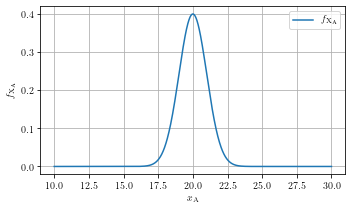

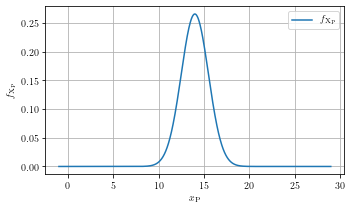

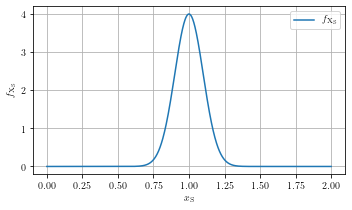

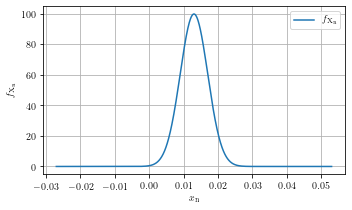

In [3]:
for i in range(0,len(MEAN)):
    plt.figure(figsize=(12 /2.54,7/2.54))
    plt.grid()
    x = np.linspace(MEAN[i]-((COV[i][i])**0.5)*10,MEAN[i]+((COV[i][i])**0.5)*10,1001)    
    y=norm.pdf(x,MEAN[i],COV[i][i]**0.5)
    plt.plot(x,y,label='$f_{\mathrm{X_'+NAMES[i]+'}}$')
    plt.legend()
    plt.xlabel('$x_{\mathrm{'+NAMES[i]+'}}$')
    plt.ylabel('$f_{\mathrm{X_'+NAMES[i]+'}}$')
    plt.tight_layout(pad=0.1)

Derivatives for Taylor series expansion of the function V around mA,mP,mS,mn

In [4]:
gA_d=diff(V,A)
gP_d=diff(V,P)
gS_d=diff(V,S)
gn_d=diff(V,n)
gA_dd=diff(gA_d,A)
gP_dd=diff(gP_d,P)
gS_dd=diff(gS_d,S)
gn_dd=diff(gn_d,n)
gAP_dd=diff(gA_d,P)
gAS_dd=diff(gA_d,S)
gAn_dd=diff(gA_d,n)
gPS_dd=diff(gP_d,S)
gPn_dd=diff(gP_d,n)
gSn_dd=diff(gS_d,n)

#In the 'derivatives' DataFrame all symbolic expressions of derivaties as well as evaluated values
#of the derivatives at mA,mP,mS,mn are stored
derivatives=pd.DataFrame({'notations':['gA_d','gP_d','gS_d','gn_d','gA_dd','gP_dd','gS_dd',
   'gn_dd','gAP_dd','gAS_dd','gAn_dd','gPS_dd','gPn_dd','gSn_dd'],'formulas':[gA_d,gP_d,gS_d,
    gn_d,gA_dd,gP_dd,gS_dd,gn_dd,gAP_dd,gAS_dd,gAn_dd,gPS_dd,gPn_dd,gSn_dd]})
derivatives=derivatives.set_index('notations')

valuesList=[]
for c,v in enumerate(derivatives['formulas']):
    v=lambdify((A,P,S,n),v) #lambdify is a function, used to evaluate the function v for A,P,S,n
    valuesList=np.append(valuesList,v(mA,mP,mS,mn)) #Evaluating v at mA, mP, mS, mn
derivatives['values']=valuesList

print(derivatives)

                                                    formulas         values
notations                                                                  
gA_d       0.0666666666666667*S**0.5*(A/P)**0.66666666666...       0.325240
gP_d       -0.0666666666666667*S**0.5*(A/P)**0.6666666666...      -0.464628
gS_d               0.05*S**(-0.5)*(A/P)**0.666666666666667/n       4.878593
gn_d               -0.1*S**0.5*(A/P)**0.666666666666667/n**2    -750.552833
gA_dd      -0.0222222222222222*S**0.5*(A/P)**0.6666666666...      -0.005421
gP_dd      0.111111111111111*S**0.5*(A/P)**0.666666666666...       0.055313
gS_dd            -0.025*S**(-1.5)*(A/P)**0.666666666666667/n      -2.439297
gn_dd               0.2*S**0.5*(A/P)**0.666666666666667/n**3  115469.666655
gAP_dd     -0.0444444444444444*S**0.5*(A/P)**0.6666666666...      -0.015488
gAS_dd     0.0333333333333333*S**(-0.5)*(A/P)**0.66666666...       0.162620
gAn_dd     -0.0666666666666667*S**0.5*(A/P)**0.6666666666...     -25.018428
gPS_dd     -

Approximate values of mean and variance

In [5]:
#Neglecting 3rd and higher orders of the Taylor series expansion of V about mA, mP, mS, mn when calculating EV
EmX=lambdify((A,P,S,n),V) #lambdify is a function, used to evaluate the symbolic function V for A,P,S,n
EmX=EmX(mA,mP,mS,mn) #Evaluating V at mA, mP, mS, mn

print('EmX = g(mA,mP,mS,mn) is: {:.3f}'.format(EmX))

EV=EmX+0.5*(derivatives.loc['gA_dd']['values']*varA+derivatives.loc['gP_dd']['values']*varP\
+derivatives.loc['gS_dd']['values']*varS+derivatives.loc['gn_dd']['values']*varn\
+2*derivatives.loc['gAP_dd']['values']*covAP+2*derivatives.loc['gAS_dd']['values']*covAS\
+2*derivatives.loc['gAn_dd']['values']*covAn+2*derivatives.loc['gPS_dd']['values']*covPS\
+2*derivatives.loc['gPn_dd']['values']*covPn+2*derivatives.loc['gSn_dd']['values']*covSn)

print('Approximate theoretical value of EV is: {:.3f}'.format(EV))

#Neglecting 2nd and higher orders of the Taylor series expansion of V about mA, mP, mS, mn when calculating varV
varV=(derivatives.loc['gA_d']['values']**2)*varA\
+2*derivatives.loc['gA_d']['values']*derivatives.loc['gP_d']['values']*covAP\
+2*derivatives.loc['gA_d']['values']*derivatives.loc['gS_d']['values']*covAS\
+2*derivatives.loc['gA_d']['values']*derivatives.loc['gn_d']['values']*covAn\
+(derivatives.loc['gP_d']['values']**2)*varP\
+2*derivatives.loc['gP_d']['values']*derivatives.loc['gS_d']['values']*covPS\
+2*derivatives.loc['gP_d']['values']*derivatives.loc['gn_d']['values']*covPn\
+(derivatives.loc['gS_d']['values']**2)*varS\
+2*derivatives.loc['gS_d']['values']*derivatives.loc['gn_d']['values']*covSn\
+(derivatives.loc['gn_d']['values']**2)*varn\

print('Approximate theoretical value of varV is: {:.3f}'.format(varV)+'.')

EmX = g(mA,mP,mS,mn) is: 9.757
Approximate theoretical value of EV is: 10.637
Approximate theoretical value of varV is: 8.061.


## Simulations

Mean of V from simulations is: 12.806.
Median of V from simulations is: 9.757.
Variance of V from simulations is: 43883.099.


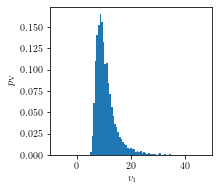

In [6]:
SimulValues=multivariate_normal(mean=MEAN,cov=COV) #A multivariate normal random variable
DFSimulValues=pd.DataFrame(SimulValues.rvs(size=10000)) #Draw random samples from a multivariate normal distribution
VSimulValues=pd.DataFrame(((((DFSimulValues.iloc[i][0]/DFSimulValues.iloc[i][1])**(2/3))*\
    (DFSimulValues.iloc[i][2]/100)**0.5)/DFSimulValues.iloc[i][3]) for i in range(DFSimulValues.shape[0]))

VSimulValuesMean=VSimulValues.mean()[0]
VSimulValuesMedian=VSimulValues.median()[0]
VSimulValuesVar=VSimulValues.var()[0]

print('Mean of V from simulations is: {:.3f}'.format(VSimulValuesMean)+'.')
print('Median of V from simulations is: {:.3f}'.format(VSimulValuesMedian)+'.')
print('Variance of V from simulations is: {:.3f}'.format(VSimulValuesVar)+'.')

#Plot
fig=plt.figure(figsize=(8 /2.54,7/2.54))
plt.hist(np.array(VSimulValues),bins=101,range=(-10, 50),density=True)
plt.xlabel('$v_{\mathrm{i}}$')
plt.ylabel('$p_{\mathrm{V}}$')
plt.xlim(-10,50)
plt.tight_layout()
plt.savefig('fV.png')

## Parametric study of varV

Variance of V and mean value of V obtained from simulations varies considerably from the theoretical approximate variation. Since the coefficient of variation of n is the highest among A,P,S and n, parametric study is performed in this chapter. varn is varied from 0.0002 to 0.004 in 20 steps and comparison of calculated theoretical approximate varV, EV with varV and meanV obtained from simulations is presented at the end.

In [7]:
#varn is changed in for loop
var_list_in=np.linspace(0.0002,0.004,20)
var_list_out_theor=[]
mean_list_out_theor=[]
var_list_out_simul=[]
mean_list_out_simul=[]
for i in range(len(var_list_in)):
    #Theoretically
    stdA,stdP,stdS,stdn=1, 1.5, 0.1, var_list_in[i]
    varA,varP,varS,varn=stdA**2,stdP**2,stdS**2,stdn**2
    covAP=roAP*stdA*stdP
    covAS=roAS*stdA*stdS
    covAn=roAn*stdA*stdn
    covPS=roPS*stdP*stdS
    covPn=roPn*stdP*stdn
    covSn=roSn*stdS*stdn

    COV=np.array([[varA,covAP,covAS,covAn],[covAP,varP,covPS,covPn],[covAS,covPS,varS,covSn],[covAn,covPn,covSn,varn]])

    #Neglecting 3rd and higher orders of the Taylor series expansion of V about mA, mP, mS, mn when calculating EV
    EmX=lambdify((A,P,S,n),V) #lambdify is a function, used to evaluate the symbolic function V for A,P,S,n
    EmX=EmX(mA,mP,mS,mn) #Evaluating V at mA, mP, mS, mn

    EV=EmX+0.5*(derivatives.loc['gA_dd']['values']*varA+derivatives.loc['gP_dd']['values']*varP\
    +derivatives.loc['gS_dd']['values']*varS+derivatives.loc['gn_dd']['values']*varn\
    +2*derivatives.loc['gAP_dd']['values']*covAP+2*derivatives.loc['gAS_dd']['values']*covAS\
    +2*derivatives.loc['gAn_dd']['values']*covAn+2*derivatives.loc['gPS_dd']['values']*covPS\
    +2*derivatives.loc['gPn_dd']['values']*covPn+2*derivatives.loc['gSn_dd']['values']*covSn)
    
    mean_list_out_theor.append(EV)

    #Neglecting 2nd and higher orders of the Taylor series expansion of V about mA, mP, mS, mn when calculating varV
    varV=(derivatives.loc['gA_d']['values']**2)*varA\
    +2*derivatives.loc['gA_d']['values']*derivatives.loc['gP_d']['values']*covAP\
    +2*derivatives.loc['gA_d']['values']*derivatives.loc['gS_d']['values']*covAS\
    +2*derivatives.loc['gA_d']['values']*derivatives.loc['gn_d']['values']*covAn\
    +(derivatives.loc['gP_d']['values']**2)*varP\
    +2*derivatives.loc['gP_d']['values']*derivatives.loc['gS_d']['values']*covPS\
    +2*derivatives.loc['gP_d']['values']*derivatives.loc['gn_d']['values']*covPn\
    +(derivatives.loc['gS_d']['values']**2)*varS\
    +2*derivatives.loc['gS_d']['values']*derivatives.loc['gn_d']['values']*covSn\
    +(derivatives.loc['gn_d']['values']**2)*varn\

    var_list_out_theor.append(varV)

    #Simulations
    SimulValues=multivariate_normal(mean=MEAN,cov=COV) #A multivariate normal random variable
    DFSimulValues=pd.DataFrame(SimulValues.rvs(size=10000)) #Draw random samples from a multivariate normal distribution
    VSimulValues=pd.DataFrame(((((DFSimulValues.iloc[i][0]/DFSimulValues.iloc[i][1])**(2/3))*\
        (DFSimulValues.iloc[i][2]/100)**0.5)/DFSimulValues.iloc[i][3]) for i in range(DFSimulValues.shape[0]))

    mean_list_out_simul.append(VSimulValues.mean()[0])
    var_list_out_simul.append(VSimulValues.var()[0])


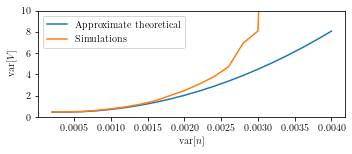

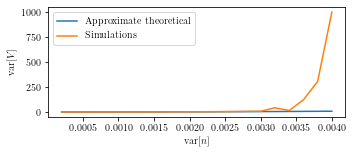

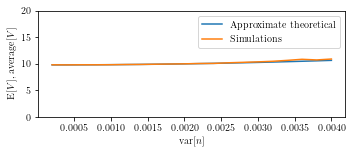

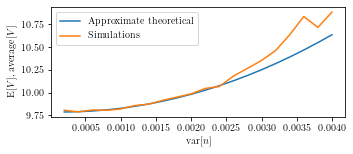

In [8]:
#Plot
fig=plt.figure(figsize=(12 /2.54,5/2.54))
plt.plot(var_list_in,var_list_out_theor,label='Approximate theoretical')
plt.plot(var_list_in,var_list_out_simul, label='Simulations')
plt.xlabel('$\mathrm{var}[n]$')
plt.ylabel('$\mathrm{var}[V]$')
plt.ylim(0,10)
plt.legend()
plt.tight_layout(pad=0.1)
#plt.savefig('fV_parametr_var_ylimit.png')

fig=plt.figure(figsize=(12 /2.54,5/2.54))
plt.plot(var_list_in,var_list_out_theor,label='Approximate theoretical')
plt.plot(var_list_in,var_list_out_simul, label='Simulations')
plt.xlabel('$\mathrm{var}[n]$')
plt.ylabel('$\mathrm{var}[V]$')
plt.legend()
plt.tight_layout(pad=0.1)
#plt.savefig('fV_parametr_var_no_ylimit.png')

fig=plt.figure(figsize=(12 /2.54,5/2.54))
plt.plot(var_list_in,mean_list_out_theor,label='Approximate theoretical')
plt.plot(var_list_in,mean_list_out_simul, label='Simulations')
plt.xlabel('$\mathrm{var}[n]$')
plt.ylabel('$\mathrm{E}[V]$, $\mathrm{average}[V]$')
plt.ylim(0,20)
plt.legend()
plt.tight_layout(pad=0.1)
#plt.savefig('fV_parametr_mean_ylimit.png')

fig=plt.figure(figsize=(12 /2.54,5/2.54))
plt.plot(var_list_in,mean_list_out_theor,label='Approximate theoretical')
plt.plot(var_list_in,mean_list_out_simul, label='Simulations')
plt.xlabel('$\mathrm{var}[n]$')
plt.ylabel('$\mathrm{E}[V]$, $\mathrm{average}[V]$')
plt.legend()
plt.tight_layout(pad=0.1)
#plt.savefig('fV_parametr_mean_no_ylimit.png')

It can be seen that var[$n$] contributes importantly to the var[$V$] and E[$V$]. When the var[$n$] is raised above $\approx$ 0.0032, large deviations can be observed between approximate theoretical values and values, obtained from simulation.